In [1]:
%matplotlib notebook
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos
from math import ceil, floor

# `matplotlib.animation.FuncAnimation`

[FuncAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation)

Makes an animation by repeatedly calling a function func.
    
**Parameters**

* `fig`: *Figure*

    The figure object used to get needed events, such as draw or resize.

* `func`: *callable*

    The function to call at each frame. The first argument will be the next value in frames. Any additional positional arguments can be supplied via the fargs parameter.

    The required signature is:

    ```python
    def func(frame, *fargs) -> iterable_of_artists
    ```
    
    If blit == True, func must return an iterable of all artists that were modified or created. This information is used by the blitting algorithm to determine which parts of the figure have to be updated. The return value is unused if blit == False and may be omitted in that case.
    
* `frames`: *iterable*, *int*, *generator function*, or *None*, optional

* `init_func`: *callable*, optional

    A function used to draw a clear frame. If not given, the results of drawing from the first item in the frames sequence will be used. This function will be called once before the first frame.

    The required signature is:
    ```python
    def init_func() -> iterable_of_artists
    ```
If blit == True, init_func must return an iterable of artists to be re-drawn. This information is used by the blitting algorithm to determine which parts of the figure have to be updated. The return value is unused if blit == False and may be omitted in that case.

    You must store the created Animation in a variable that lives as long as the animation should run. Otherwise, the Animation object will be garbage-collected and the animation stops.

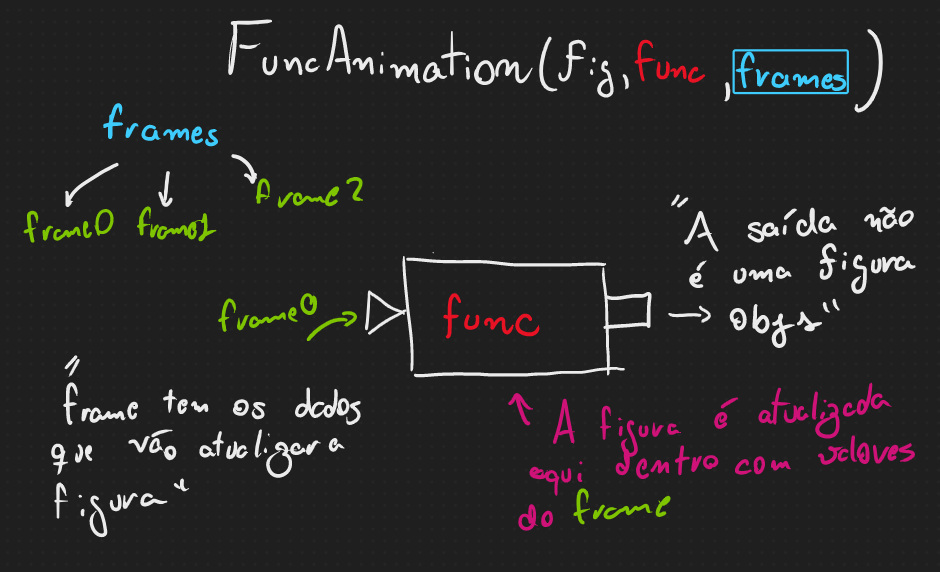

# Plotando uma curva

<IPython.core.display.Javascript object>


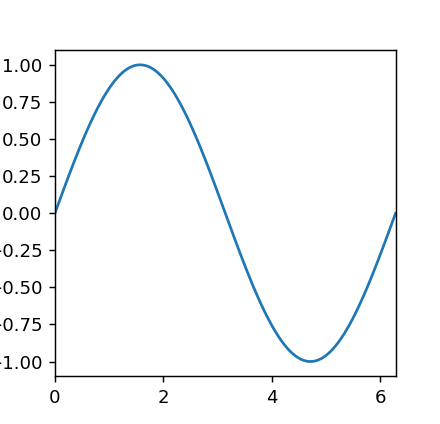

In [2]:
#-------------------------
# Config
FPS = 60
time = 2

#-------------------------
# Constroi a figura e o axes onde os dados serão mostrados
fig, ax = plt.subplots()
ax.set_xlim(0, 2*pi)
ax.set_ylim(-1.1, 1.1)

#------------------------
# Inicializa os artistas e os dados respectivos
line, = ax.plot([])
xdata = []
ydata = []

#------------------------
# Constroi todos os dados usados na animacao
x1 = np.linspace(0, 2*pi, time*FPS)
y1 = sin(x1)

xydata = list(zip(x1, y1))

#------------------------
# Função de inicialização de animação
def init():
    # Limpa o conteúdo de xdata e ydata
    del xdata[:]
    del ydata[:]
    
    # Reseta o artista line
    line.set_data(xdata, ydata)
    
    return line,

#------------------------
# Função de atualização da animação
def update(xydata):
    x, y = xydata
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    
    return line,

#------------------------
# Animação e salvamento
anim = FuncAnimation(fig, update, frames = xydata, init_func = init,
             interval = 1000/FPS, repeat = False);
anim.save('sine.mp4');

# Plotando duas curvas

<IPython.core.display.Javascript object>


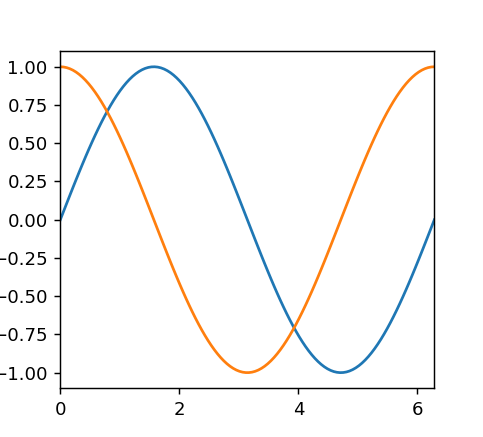

In [3]:
#-------------------------
# Config
FPS = 60
time = 2

#-------------------------
# Constroi a figura e o axes onde os dados serão mostrados
fig, ax = plt.subplots()
ax.set_xlim(0, 2*pi)
ax.set_ylim(-1.1, 1.1)

#------------------------
# Inicializa os artistas e os dados respectivos
line1, = ax.plot([])
line2, = ax.plot([])
xdata = []
y1data = []
y2data = []

#------------------------
# Constroi todos os dados usados na animacao
x1 = np.linspace(0, 2*pi, time*FPS)
y1 = sin(x1)
y2 = cos(x1)

xydata = list(zip(x1, y1, y2))

#------------------------
# Função de inicialização de animação
def init():
    # Limpa o conteúdo de xdata e ydata
    del xdata[:]
    del y1data[:]
    del y2data[:]
    
    # Reseta o artista line
    line1.set_data(xdata, y1data)
    line2.set_data(xdata, y2data)
    
    return line1, line2,

#------------------------
# Função de atualização da animação
def update(xydata):
    x, y1, y2 = xydata
    
    xdata.append(x)
    y1data.append(y1)
    y2data.append(y2)
    
    line1.set_data(xdata, y1data)
    line2.set_data(xdata, y2data)
    
    return line1, line2,

#------------------------
# Animação e salvamento
anim = FuncAnimation(fig, update, frames = xydata, init_func = init,
             interval = 1000/FPS, repeat = False);
anim.save('sineandcosine.mp4');

# Plotando N curvas

<IPython.core.display.Javascript object>


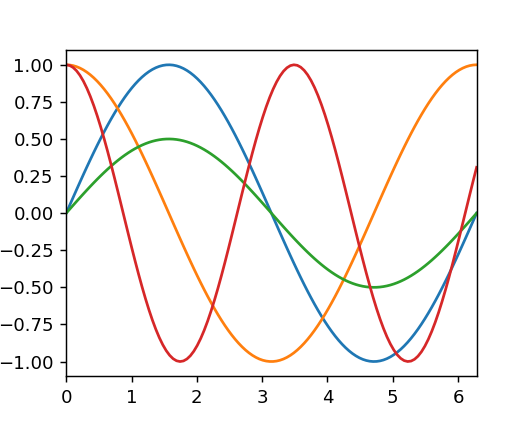

In [40]:
#-------------------------
# Config
FPS = 60
time = 2

#-------------------------
# Constroi a figura e o axes onde os dados serão mostrados
fig, ax = plt.subplots()
ax.set_xlim(0, 2*pi)
ax.set_ylim(-1.1, 1.1)

#------------------------
# Inicializa os artistas e os dados respectivos

y_funcs = [sin, cos, lambda x: .5*sin(x), lambda x: cos(1.8*x)]
N = len(y_funcs)
lines = []
ydatas = []
for _ in range(N):
    line, = ax.plot([])
    ydata = []
    lines.append(line)
    ydatas.append(ydata)

xdata = []

#------------------------
#Constroi todos os dados usados na animacao
x1 = np.linspace(0, 2*pi, time*FPS)

yvals = []
for y_func in y_funcs:
    yval = y_func(x1)
    yvals.append(yval)

xydata = list(zip(x1, *yvals))

#------------------------
# Função de inicialização de animação
def init():
    # Limpa o conteúdo de xdata e ydata
    del xdata[:]
    for ydata in ydatas:
        del ydata[:]
    
    # Reseta o artista line
    for line, ydata in zip(lines, ydatas):
        line.set_data(xdata, ydata)
    
    return lines,

#------------------------
# Função de atualização da animação
def update(xydata):
    x, *ys = xydata
    
    xdata.append(x)
    for y, ydata in zip(ys, ydatas):
        ydata.append(y)
    
    for line, ydata in zip(lines, ydatas):
        line.set_data(xdata, ydata)
    
    return lines,

#------------------------
# Animação e salvamento
anim = FuncAnimation(fig, update, frames = xydata, init_func = init,
             interval = 1000/FPS, repeat = False);
anim.save('waves.mp4');

<IPython.core.display.Javascript object>


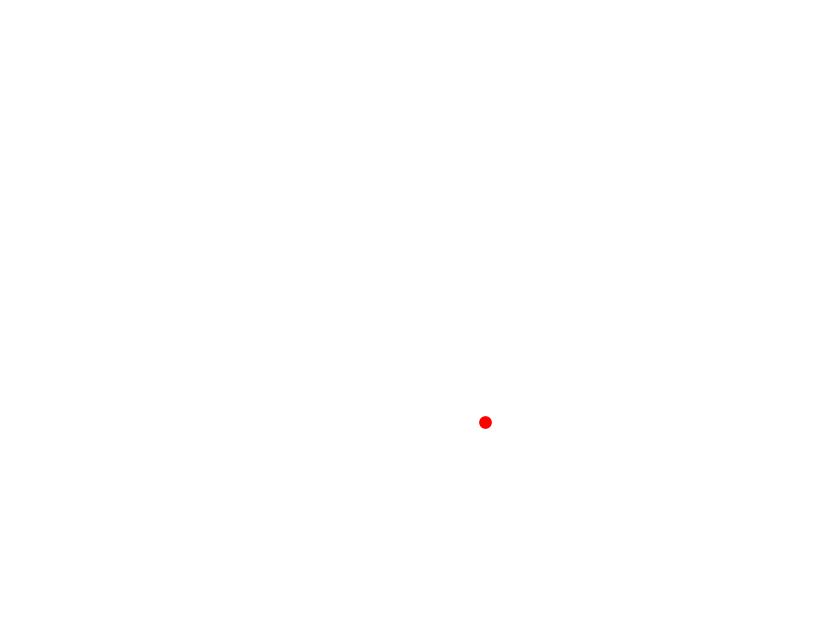

In [45]:
#-------------------------
# Config
FPS = 60
time = 9

#-------------------------
# Constroi a figura e o axes onde os dados serão mostrados
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_box_aspect(1)
ax.axis('off')

#------------------------
# Inicializa os artistas e os dados respectivos
line, = ax.plot([], [], 'or')

#------------------------
#Constroi todos os dados usados na animacao
volta = 2*pi
t = np.linspace(0, 3*volta, time*FPS)
x = cos(t)
y = sin(t)
xydata = list(zip(x, y))

#------------------------
# Função de inicialização de animação
def init():
    # Limpa o conteúdo de xdata e ydata
    line.set_data(x[0], y[0])
    
    return line,

#------------------------
# Função de atualização da animação
def update(xy):
    x, y = xy
    line.set_data(x, y)
    
    return lines,

#------------------------
# Animação e salvamento
anim = FuncAnimation(fig, update, frames = xydata, init_func = init,
             interval = 1000/FPS, repeat = False);
anim.save('particle-circle.mp4');